<a href="https://colab.research.google.com/github/yuribp0107/Congreso_Tecnologos_medicos_2023/blob/main/Desfunciones_por_enfermedad_vs_homicidios_Chile_2018_2025_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Libreria**

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**DEIS**

In [ ]:
"""
Script para:
1. Cargar bases de mortalidad DEIS 1990–2022 y 2023–2025.
2. Seleccionar columnas de interés.
3. Unificar ambos dataframes en uno solo.
4. Ordenar cronológicamente por año y fecha de defunción.
"""

import pandas as pd

# -------------------------------------------------------------------
# 1. Definir las rutas de los archivos CSV
# -------------------------------------------------------------------
file_path_1990_2022 = (
    "/content/drive/MyDrive/Base de datos Mortalidad/DEIS/"
    "DEFUNCIONES_FUENTE_DEIS_1990_2022_CIFRAS_OFICIALES.csv"
)

file_path_2023_2025 = (
    "/content/drive/MyDrive/Base de datos Mortalidad/DEIS/"
    "DEFUNCIONES_FUENTE_DEIS_2023_2025_11112025.csv"
)

# -------------------------------------------------------------------
# 2. Cargar los CSV desde Google Drive
#    Se usa ISO-8859-1 y separador ';' de acuerdo al formato del DEIS.
# -------------------------------------------------------------------
df_1990_2022 = pd.read_csv(
    file_path_1990_2022,
    encoding="ISO-8859-1",
    sep=";",
    engine="python",
)

df_2023_2025 = pd.read_csv(
    file_path_2023_2025,
    encoding="ISO-8859-1",
    sep=";",
    engine="python",
)

# -------------------------------------------------------------------
# 3. Filtrar la base 1990–2022 para quedarnos solo con 2018–2022
df_1990_2022 = df_1990_2022[df_1990_2022["AÑO"] >= 2018]

# -------------------------------------------------------------------
# 4. Seleccionar columnas de interés en cada dataframe
#    Se usa .copy() para trabajar con copias seguras.
# -------------------------------------------------------------------
columnas_interes = [
    "AÑO",
    "FECHA_DEF",
    "SEXO_NOMBRE",
    "EDAD_TIPO",
    "EDAD_CANT",
    "COD_COMUNA",
    "COMUNA",
    "NOMBRE_REGION",
    "DIAG1",
    "CAPITULO_DIAG1",
    "GLOSA_CAPITULO_DIAG1",
    "LUGAR_DEFUNCION",
]

df_1990_2022_filter = df_1990_2022[columnas_interes].copy()
df_2023_2025_filter = df_2023_2025[columnas_interes].copy()

# -------------------------------------------------------------------
# 5. Concatenar ambos dataframes en uno solo
#    ignore_index=True rehace el índice para que sea continuo.
# -------------------------------------------------------------------
df_mortalidad = pd.concat(
    [df_1990_2022_filter, df_2023_2025_filter],
    axis=0,
    ignore_index=True,
)

# -------------------------------------------------------------------
# 6. Asegurar que la columna AÑO sea numérica
#    Esto evita problemas si el CSV la trae como texto.
# -------------------------------------------------------------------
df_mortalidad["AÑO"] = pd.to_numeric(
    df_mortalidad["AÑO"],
    errors="coerce",
)

# -------------------------------------------------------------------
# 7. Ordenar el dataframe unificado por AÑO y FECHA_DEF
#    FECHA_DEF suele venir como string 'YYYY-MM-DD', lo que permite
#    un orden cronológico correcto incluso sin convertir a datetime.
# -------------------------------------------------------------------
df_mortalidad = df_mortalidad.sort_values(
    by=["AÑO", "FECHA_DEF"],
    ascending=[True, True],
).reset_index(drop=True)



####**Frecuencia de Causas de Defunción periodo 2018-2025**

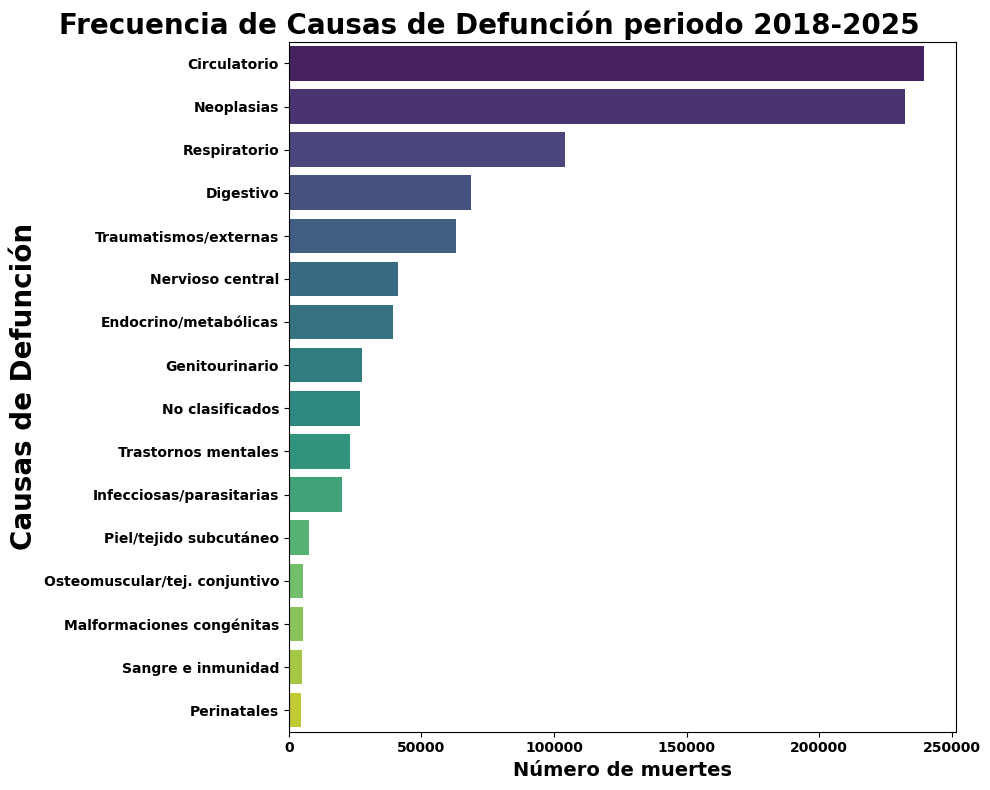

In [ ]:
# Diccionario de reemplazos para los nombres de las enfermedades
reemplazos = {
    (
        "Traumatismos, envenenamientos y algunas otras consecuencias "
        "de causas externas"
    ): "Traumatismos, envenenamientos y causas externas",
    (
        "Síntomas, signos y hallazgos anormales clínicos y de laboratorio, "
        "no clasificados en otra parte"
    ): "no clasificados en otra parte",
    (
        "Enfermedades de la sangre y de los órganos hematopoyéticos, "
        "y ciertos trastornos que afectan el mecanismo de la inmunidad"
    ): "Enfermedades de la sangre e inmunidad",
}

# Limpiar espacios en blanco al inicio/fin en la glosa del capítulo
df_mortalidad["GLOSA_CAPITULO_DIAG1"] = (
    df_mortalidad["GLOSA_CAPITULO_DIAG1"]
    .astype("string")  # asegura tipo compatible con .str
    .str.strip()       # elimina espacios extra
)

# Definir los valores que se desean excluir
valores_excluir = [
    "Embarazo, parto y puerperio",
    "Enfermedades del oído y de la apófisis mastoides",
    "Enfermedades del ojo y sus anexos",
    "Códigos para propósitos especiales",
    "Causas externas de morbilidad y de mortalidad",
]

# Filtrar el dataframe para remover esas categorías y los NaN
df_mortalidad_filtrado = df_mortalidad[
    ~df_mortalidad["GLOSA_CAPITULO_DIAG1"].isin(valores_excluir)
    & df_mortalidad["GLOSA_CAPITULO_DIAG1"].notna()
].copy()

# Contar frecuencia de cada causa (usando el dataframe filtrado)
conteo_causas = (
    df_mortalidad_filtrado["GLOSA_CAPITULO_DIAG1"]
    .value_counts()
    .rename(index=reemplazos)  # aplica el diccionario de reemplazos
    .reset_index()
)

# Renombrar columnas para el gráfico
conteo_causas.columns = ["Causa de Defunción", "Frecuencia"]

# Crear nombres abreviados para el gráfico
abreviaciones_causas = {
    "Enfermedades del sistema circulatorio": "Circulatorio",
    "Tumores [Neoplasias]": "Neoplasias",
    "Enfermedades del sistema respiratorio": "Respiratorio",
    "Enfermedades del sistema digestivo": "Digestivo",
    "Traumatismos, envenenamientos y causas externas": "Traumatismos/externas",
    "Enfermedades del sistema nervioso central": "Nervioso central",
    "Enfermedades endocrinas, nutricionales y metabólicas": (
        "Endocrino/metabólicas"
    ),
    "Enfermedades del sistema genitourinario": "Genitourinario",
    "no clasificados en otra parte": "No clasificados",
    "Trastornos mentales y del comportamiento": "Trastornos mentales",
    "Ciertas enfermedades infecciosas y parasitarias": "Infecciosas/parasitarias",
    "Enfermedades de la piel y del tejido subcutáneo": (
        "Piel/tejido subcutáneo"
    ),
    "Enfermedades del sistema osteomuscular y del tejido conjuntivo": (
        "Osteomuscular/tej. conjuntivo"
    ),
    "Malformaciones congénitas, deformidades y anomalías cromosómicas": (
        "Malformaciones congénitas"
    ),
    "Enfermedades de la sangre e inmunidad": "Sangre e inmunidad",
    "Ciertas afecciones originadas en el período perinatal": "Perinatales",
}

conteo_causas["Causa corta"] = (
    conteo_causas["Causa de Defunción"]
    .map(abreviaciones_causas)
    .fillna(conteo_causas["Causa de Defunción"])  # por si alguna no está en el diccionario
)

# Ordenar por frecuencia descendente
conteo_causas = conteo_causas.sort_values(
    by="Frecuencia",
    ascending=False,
)

# Gráfico
plt.figure(figsize=(10, 8))

sns.barplot(
    x="Frecuencia",
    y="Causa corta",   # usamos el nombre abreviado
    data=conteo_causas,
    hue="Causa corta",
    palette="viridis",
    legend=False,
)

# Título y etiquetas en negrita
plt.title(
    "Frecuencia de Causas de Defunción periodo 2018-2025",
    fontweight="bold",
    fontsize=20,
    x=0.3
)
plt.xlabel("Número de muertes", fontsize=14, fontweight="bold")
plt.ylabel("Causas de Defunción", fontweight="bold", fontsize=20)

# Causas (eje Y) en negrita y, si quieres, también los ticks del eje X
plt.yticks(fontweight="bold")
plt.xticks(fontweight="bold")

plt.tight_layout()
plt.show()


####**Tendencia anual del número de muertes**

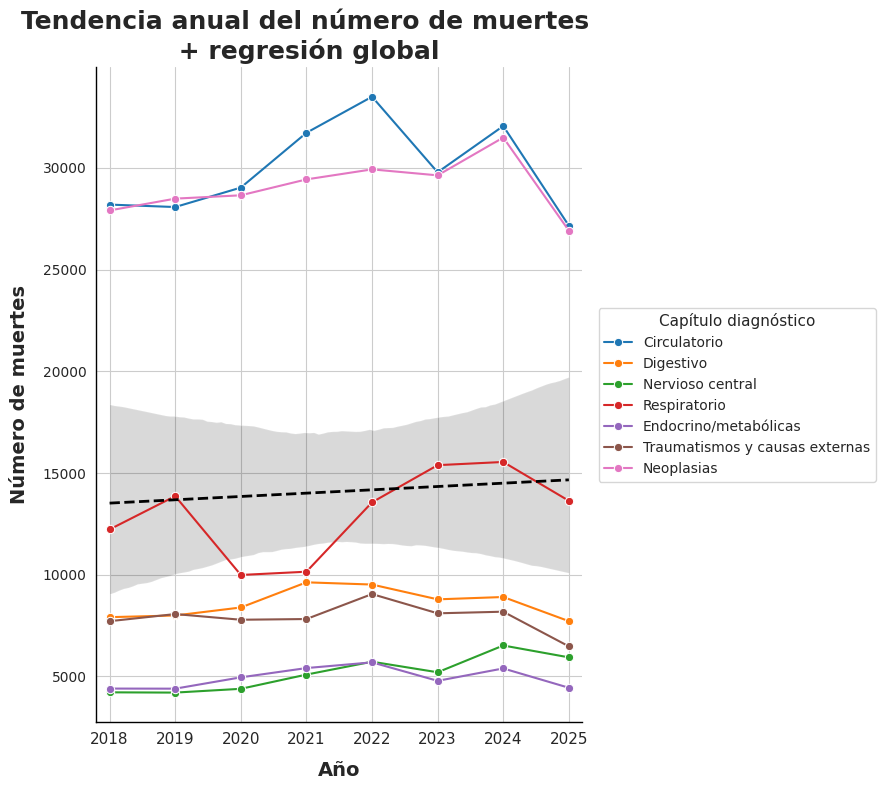

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# -------------------------------------------------------------------
# 1. Asegurar que AÑO sea numérico y filtrar el periodo 2018–2025
# -------------------------------------------------------------------
df_mortalidad_filtrado["AÑO"] = pd.to_numeric(
    df_mortalidad_filtrado["AÑO"],
    errors="coerce",
)

df_mortalidad_filtrado = df_mortalidad_filtrado[
    (df_mortalidad_filtrado["AÑO"] >= 2018)
    & (df_mortalidad_filtrado["AÑO"] <= 2025)
].copy()

# -------------------------------------------------------------------
# 2. Tabla anual: número de muertes por año y capítulo diagnóstico
# -------------------------------------------------------------------
tabla_anual = (
    df_mortalidad_filtrado
    .groupby(["AÑO", "GLOSA_CAPITULO_DIAG1"])
    .size()
    .reset_index(name="Frecuencia")
)

# -------------------------------------------------------------------
# 3. Seleccionar las 7 causas más frecuentes
# -------------------------------------------------------------------
top_n = 7

top_capitulos = (
    tabla_anual
    .groupby("GLOSA_CAPITULO_DIAG1")["Frecuencia"]
    .sum()
    .sort_values(ascending=False)
    .head(top_n)
    .index
)

tabla_top = tabla_anual[
    tabla_anual["GLOSA_CAPITULO_DIAG1"].isin(top_capitulos)
].copy()
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Diccionario para abreviar las glosas largas
abreviaciones = {
    "Enfermedades del sistema circulatorio": "Circulatorio",
    "Enfermedades del sistema digestivo": "Digestivo",
    "Enfermedades del sistema nervioso central": "Nervioso central",
    "Enfermedades del sistema respiratorio": "Respiratorio",
    "Enfermedades endocrinas, nutricionales y metabólicas": "Endocrino/metabólicas",
    (
        "Traumatismos, envenenamientos y algunas otras consecuencias "
        "de causas externas"
    ): "Traumatismos y causas externas",
    "Tumores [Neoplasias]": "Neoplasias",
}

# Crear una columna con el nombre corto
tabla_top["CAPITULO_CORTO"] = (
    tabla_top["GLOSA_CAPITULO_DIAG1"]
    .map(abreviaciones)
    .fillna(tabla_top["GLOSA_CAPITULO_DIAG1"])
)
plt.figure(figsize=(9, 8))  # más angosto para que los años queden más cerca

# Líneas de tendencia por causa (usando nombres cortos en la leyenda)
sns.lineplot(
    data=tabla_top,
    x="AÑO",
    y="Frecuencia",
    hue="CAPITULO_CORTO",
    marker="o",
)

# Línea de regresión global (todos los puntos de las 7 causas)
sns.regplot(
    data=tabla_top,
    x="AÑO",
    y="Frecuencia",
    scatter=False,
    ci=95,
    color="black",
    line_kws={"linewidth": 2, "linestyle": "--"},
)

# --- TÍTULO Y ETIQUETAS CON MAYOR TAMAÑO ---
plt.title(
    "Tendencia anual del número de muertes\n"
    " + regresión global",
    fontsize=18,
    fontweight="bold",
    x=0.43
)
plt.xlabel("Año", fontsize=14, fontweight="bold", labelpad=10)
plt.ylabel("Número de muertes", fontsize=14, fontweight="bold", labelpad=10)

# --- DISMINUIR ESPACIOS HORIZONTALES ENTRE AÑOS ---
plt.xticks(sorted(tabla_top["AÑO"].unique()), fontsize=11)
plt.xlim(tabla_top["AÑO"].min() - 0.2, tabla_top["AÑO"].max() + 0.2)

# --- DESTACAR LOS EJES ---
ax = plt.gca()
for lado in ["left", "bottom"]:
    ax.spines[lado].set_linewidth(1)
    ax.spines[lado].set_color("black")

# Opcional: ocultar ejes superior y derecho
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.tick_params(axis="both", width=1.5)  # hace más gruesas las marcas de los ejes

# Leyenda al lado derecho del gráfico
handles, labels = ax.get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=labels,
    title="Capítulo diagnóstico",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    ncol=1,
    fontsize=10,
    title_fontsize=11,
)

plt.tight_layout()
plt.show()


##**Homicidios**

In [ ]:
# ============================================================
# Anexo. Funciones auxiliares
# ============================================================

def freq_table(series, sort_index=False):
    """
    Tabla de frecuencias absoluta y relativa (%) para una serie.
    sort_index=True para ordenar por categoría en vez de por frecuencia.
    """
    counts = series.value_counts(dropna=False)
    if sort_index:
        counts = counts.sort_index()
    perc = round(counts / counts.sum() * 100, 1)
    table = pd.DataFrame({"n": counts, "%": perc})
    return table

def print_section(title):
    print("\n" + "=" * 70)
    print(title)
    print("=" * 70 + "\n")


In [ ]:
# =========================
# 1. Cargar la base
# =========================
# Ruta al archivo (ajusta si tu archivo está en otro directorio)
FILE_PATH = "/content/drive/MyDrive/Base de datos Mortalidad/Homicidios/Base-VHC_2018_PS2025.xlsx"

# Leer el libro de Excel
xls = pd.ExcelFile(FILE_PATH)

# Cargar hoja principal
df_base = pd.read_excel(xls, sheet_name="BBDD")
df = df_base.copy()

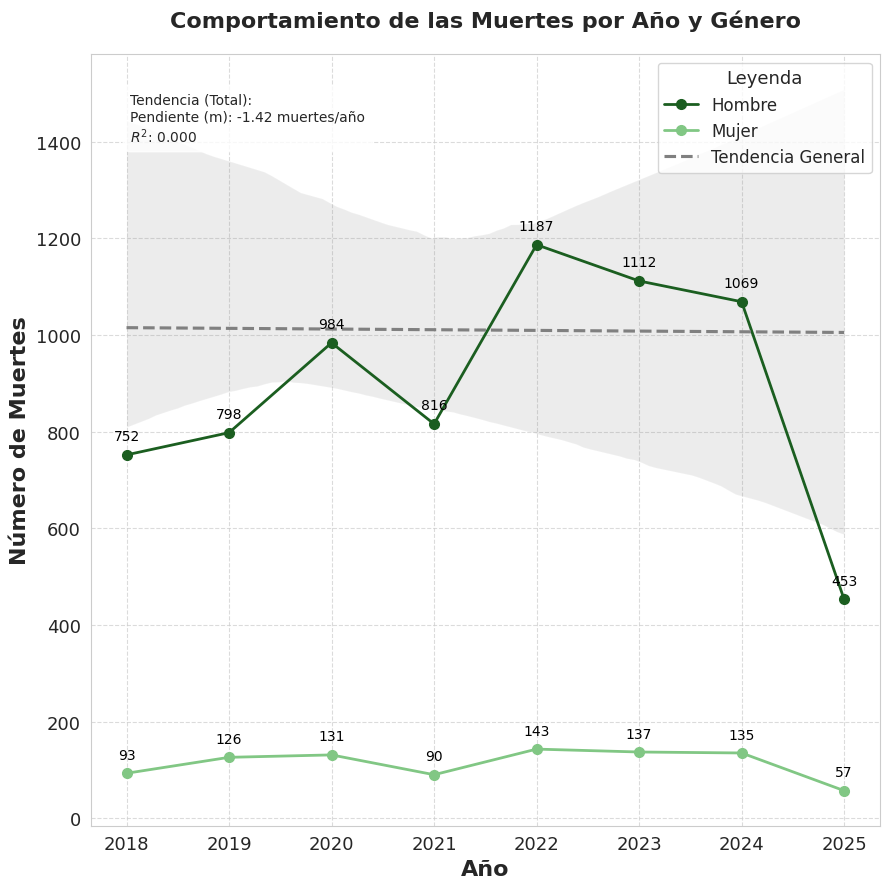

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats  # --- ¡NUEVO! Importar Scipy para la regresión ---

# =========================================================
# CONFIGURACIÓN
# =========================================================

sex_to_keep = ["Hombre", "Mujer"]
sexo_color_map = {
    "Hombre": "#1B5E20",  # verde oscuro
    "Mujer":  "#81C784"   # verde claro
}

# =========================================================
# 1. PREPARACIÓN DE DATOS
# =========================================================

# Asumiendo que 'df' es tu DataFrame original
df_plot_line = df[df["SEXO_RECOD_F"].isin(sex_to_keep)].copy()

# Agrupa por año y sexo
muertes_por_ano_sexo = df_plot_line.groupby(['ID_ANO', 'SEXO_RECOD_F']).size().reset_index(name='Frecuencia')

# Asegura que todos los años y sexos estén presentes (rellena con 0)
all_years = muertes_por_ano_sexo['ID_ANO'].unique()
all_sexes = sexo_color_map.keys()
idx = pd.MultiIndex.from_product([all_years, all_sexes], names=['ID_ANO', 'SEXO_RECOD_F'])
muertes_por_ano_sexo = muertes_por_ano_sexo.set_index(['ID_ANO', 'SEXO_RECOD_F']).reindex(idx, fill_value=0).reset_index()

# Calcular el total de muertes por año
muertes_totales_por_ano = muertes_por_ano_sexo.groupby('ID_ANO')['Frecuencia'].sum().reset_index()

# --- ¡NUEVO! CALCULAR LA REGRESIÓN MANUALMENTE ---
# Obtener x (años) e y (frecuencia total)
x_data = muertes_totales_por_ano['ID_ANO']
y_data = muertes_totales_por_ano['Frecuencia']

# Calcular la regresión lineal
# Esto nos da: pendiente(slope), intercepto, valor-r(rvalue), valor-p, error estándar
slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)
r_squared = r_value**2 # R-cuadrado es r-valor al cuadrado

# Crear el texto para mostrar en el gráfico
# \n significa "nueva línea"
tendencia_texto = (
    f"Tendencia (Total):\n"
    f"Pendiente (m): {slope:.2f} muertes/año\n"
    f"$R^2$: {r_squared:.3f}"
)
# --- FIN DE LA SECCIÓN NUEVA ---


# =========================================================
# 2. CREACIÓN DEL GRÁFICO
# =========================================================
plt.figure(figsize=(9, 9))
ax = plt.gca()

# Iterar sobre cada sexo para graficar su línea
for sex in all_sexes:
    data_sex = muertes_por_ano_sexo[muertes_por_ano_sexo['SEXO_RECOD_F'] == sex]
    ax.plot(
        data_sex['ID_ANO'],
        data_sex['Frecuencia'],
        marker='o', linestyle='-',
        color=sexo_color_map[sex],
        label=sex,
        linewidth=2, markersize=7
    )

# Añadir LÍNEA DE REGRESIÓN GENERAL (como antes)
sns.regplot(
    data=muertes_totales_por_ano,
    x='ID_ANO', y='Frecuencia',
    ax=ax,
    color='gray',
    scatter=False,
    ci=95,
    label='Tendencia General',
    line_kws={'linestyle':'--'}
)

# --- ¡NUEVO! AÑADIR EL TEXTO AL GRÁFICO ---
ax.text(
    0.05, 0.95, # Posición (5% desde la izq, 95% desde abajo)
    tendencia_texto, # El texto que creamos
    transform=ax.transAxes, # Coordenadas relativas al gráfico
    fontsize=10,
    verticalalignment='top', # Alineación vertical
    ha='left', # Alineación horizontal
    # Un pequeño recuadro para que se lea mejor:
    bbox={'boxstyle': 'round,pad=0.5', 'facecolor': 'white', 'alpha': 0.8}
)
# --- FIN DE LA SECCIÓN NUEVA ---

# (Opcional) Añadir etiquetas de texto a los puntos de género
for index, row in muertes_por_ano_sexo.iterrows():
    if row['Frecuencia'] > 0:
        ax.text(
            row['ID_ANO'],
            row['Frecuencia'] + (muertes_por_ano_sexo['Frecuencia'].max() * 0.02),
            str(int(row['Frecuencia'])),
            color='black', ha='center', va='bottom', fontsize=10
        )

# =========================================================
# 3. AJUSTES FINALES DEL GRÁFICO
# =========================================================
plt.title(
    "Comportamiento de las Muertes por Año y Género",
    fontsize=16, fontweight="bold", pad=20
)
plt.xlabel("Año", fontsize=16, fontweight="bold")
plt.ylabel("Número de Muertes", fontsize=16, fontweight="bold")

plt.xticks(all_years, fontsize=13)
plt.yticks(fontsize=13)

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title="Leyenda", fontsize=12, title_fontsize=13, loc="upper right")
plt.tight_layout()
plt.show()

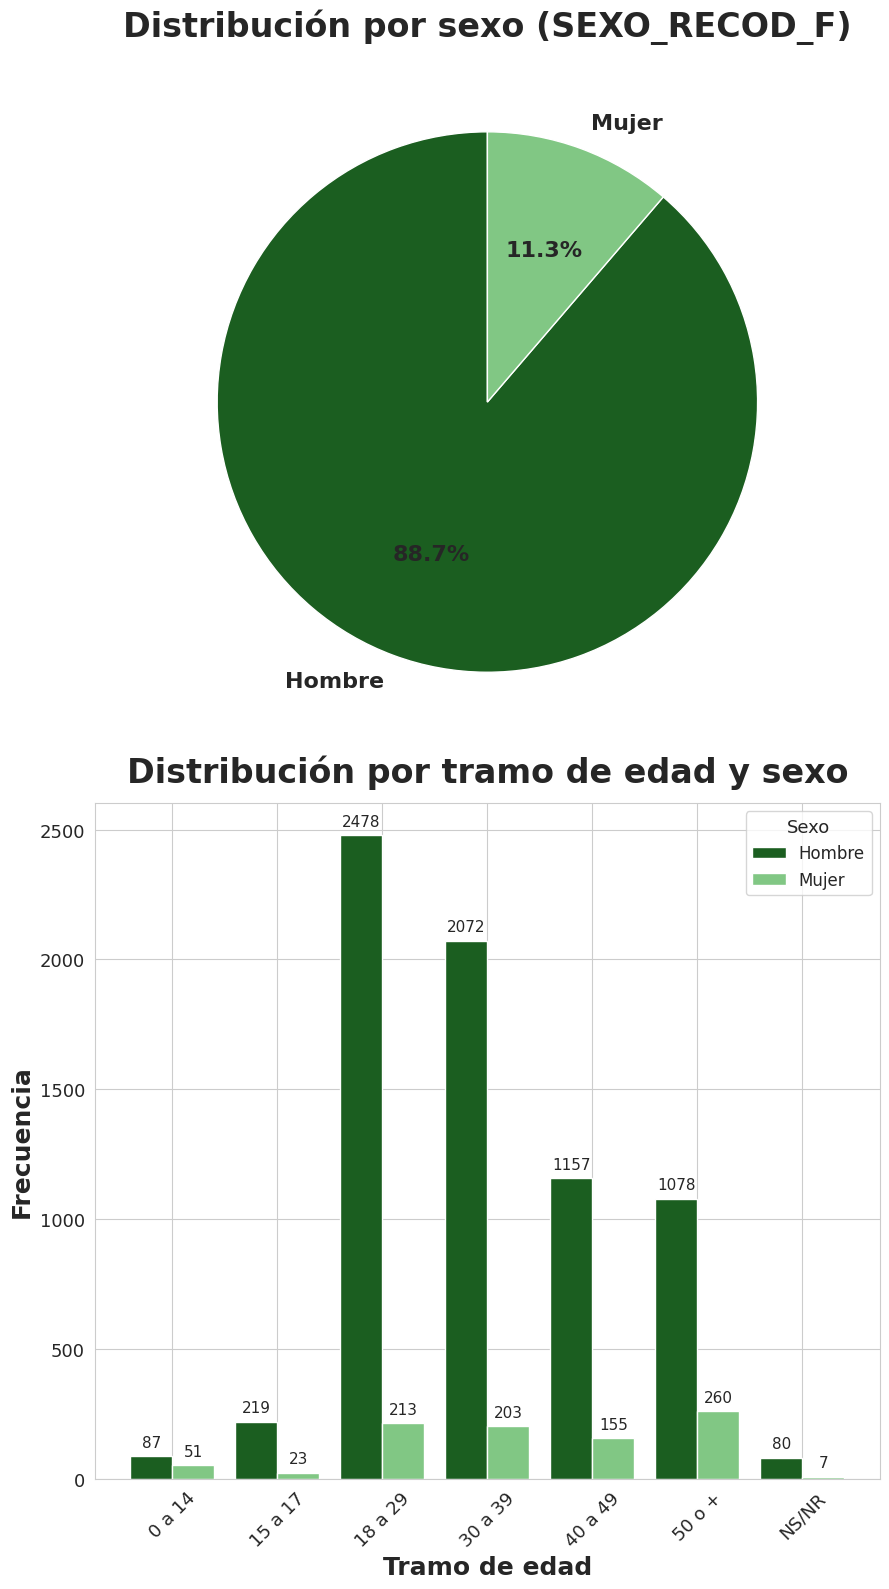

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# =========================================================
# CONFIGURACIÓN
# =========================================================

edad_order = [
    "0 a 14", "15 a 17", "18 a 29", "30 a 39",
    "40 a 49", "50 o +", "NS/NR"
]

# Mantener solo estas categorías
sex_to_keep = ["Hombre", "Mujer"]

# Colores personalizados: VERDE OSCURO / VERDE CLARO
sexo_color_map = {
    "Hombre": "#1B5E20",   # verde oscuro
    "Mujer":  "#81C784"    # verde claro
}

# =========================================================
# 1. FILTRAR DATAFRAME (df ya debe existir)
# =========================================================
df_plot = df[df["SEXO_RECOD_F"].isin(sex_to_keep)].copy()

# =========================================================
# 2. TABLAS RESUMEN
# =========================================================
sexo_counts = df_plot["SEXO_RECOD_F"].value_counts(dropna=False)
ct = pd.crosstab(df_plot["EDAD_RECOD"], df_plot["SEXO_RECOD_F"])
ct = ct.reindex(index=edad_order).fillna(0)

# =========================================================
# 3. FIGURA 9:16
# =========================================================
fig, axes = plt.subplots(2, 1, figsize=(9, 16))
plt.subplots_adjust(hspace=0.4)

sex_categories = sexo_counts.index.tolist()

# ---------------------------------------------------------
# SUBPLOT 1: PIE
# ---------------------------------------------------------
axes[0].pie(
    sexo_counts.values,
    labels=sexo_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=[sexo_color_map[s] for s in sexo_counts.index],
    textprops={"fontsize": 16, "fontweight": "bold"}
)

axes[0].set_title(
    "Distribución por sexo (SEXO_RECOD_F)",
    fontsize=24,
    fontweight="bold",
    pad=20
)

# ---------------------------------------------------------
# SUBPLOT 2: BARRAS AGRUPADAS
# ---------------------------------------------------------
ax = axes[1]

x = np.arange(len(edad_order))
n_sex = len(sex_categories)
width = 0.8 / n_sex
max_val = 0

for i, sex in enumerate(sex_categories):

    vals = ct[sex].values if sex in ct.columns else np.zeros(len(edad_order))
    offset = (i - (n_sex - 1) / 2) * width

    bars = ax.bar(
        x + offset,
        vals,
        width=width,
        color=sexo_color_map[sex],
        label=sex
    )

    max_val = max(max_val, vals.max())

    for bar, v in zip(bars, vals):
        if v > 0:
            ax.text(
                bar.get_x() + bar.get_width()/2,
                bar.get_height() + max_val * 0.01,
                str(int(v)),
                ha="center",
                va="bottom",
                fontsize=11
            )

ax.set_title(
    "Distribución por tramo de edad y sexo",
    fontsize=24,
    fontweight="bold",
    pad=15
)
ax.set_xlabel("Tramo de edad", fontsize=18, fontweight="bold")
ax.set_ylabel("Frecuencia", fontsize=18, fontweight="bold")

ax.set_xticks(x)
ax.set_xticklabels(edad_order, rotation=45, fontsize=13)
ax.tick_params(axis="y", labelsize=13)
ax.legend(title="Sexo", fontsize=12, title_fontsize=13, loc="upper right")

fig.tight_layout()
plt.show()


--- Tabla de Proporciones (%) con N total en filas ---
ANT_REC           Con Condenas  Sin Condenas
Hombre\n(N=7119)          56.7          43.3
Mujer\n(N=908)            21.4          78.6

--- Tabla de Absolutos ---
ANT_REC       Con Condenas  Sin Condenas
SEXO_RECOD_F                            
Hombre                4038          3081
Mujer                  194           714

--- Tabla de Anotaciones Personalizadas ---
ANT_REC              Con Condenas     Sin Condenas
Hombre\n(N=7119)  56.7%\n(N=4038)  43.3%\n(N=3081)
Mujer\n(N=908)     21.4%\n(N=194)   78.6%\n(N=714)


/tmp/ipython-input-3353424959.py:144: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.05, 0, 1, 0.96])



Gráfico guardado como 'heatmap_proporciones_actualizado.png'


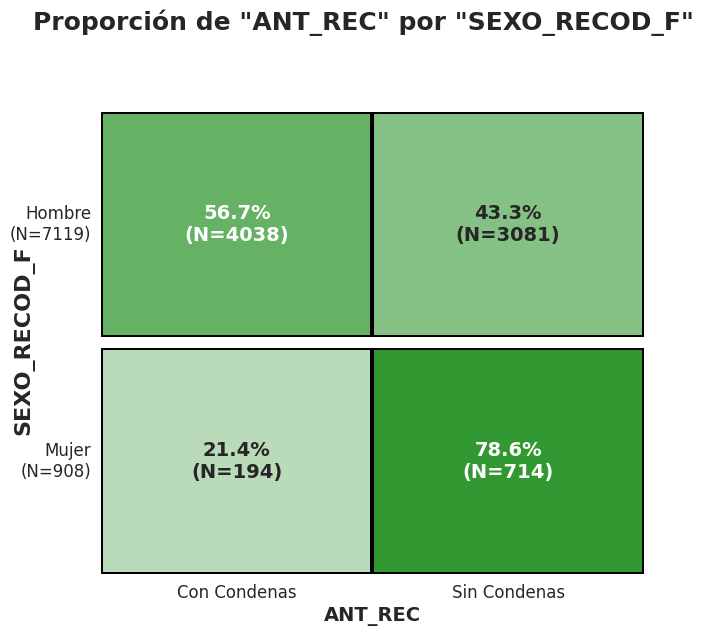

In [ ]:
df_original = df  # Asigna tu DataFrame cargado (ej. df)
col_filas = 'SEXO_RECOD_F'   # Columna para las filas (Y-axis)
col_columnas = 'ANT_REC'  # Columna para las columnas (X-axis)

# Categorías que quieres MANTENER (el resto se filtra)
categorias_filas = ['Hombre', 'Mujer']
categorias_columnas = ['Con Condenas', 'Sin Condenas']

# Define UN SOLO color base para todo el gráfico
color_base_unificado = 'green'
# --- Fin de las variables ---


# 1. FILTRAR EL DATAFRAME ORIGINAL
df_filtrado = df_original[
    (df_original[col_filas].isin(categorias_filas)) &
    (df_original[col_columnas].isin(categorias_columnas))
]

# 2. CREAR TABLAS DE PROPORCIONES Y ABSOLUTOS
# ¡Necesitamos AMBAS tablas para las nuevas etiquetas!

# Tabla de proporciones (para el color)
tabla_proporcion = pd.crosstab(
    index=df_filtrado[col_filas],
    columns=df_filtrado[col_columnas],
    normalize='index'
)
# Convertir a porcentaje
tabla_porcentaje = (tabla_proporcion * 100).round(1)

# Tabla de absolutos (para el N=...)
tabla_absolutos = pd.crosstab(
    index=df_filtrado[col_filas],
    columns=df_filtrado[col_columnas]
)

# 3. CREAR ETIQUETAS DE ANOTACIÓN PERSONALIZADAS (Modificación 4 y 5)
# Combinamos el porcentaje (de tabla_porcentaje) y el N (de tabla_absolutos)
annot_labels = (
    tabla_porcentaje.astype(str) + '%\n' +
    '(N=' + tabla_absolutos.astype(str) + ')'
)

# 4. OBTENER N TOTALES Y ACTUALIZAR ETIQUETAS DE FILAS (Modificación 3)
# Calculamos el N total por cada fila desde el df filtrado
counts = df_filtrado[col_filas].value_counts()

# Aseguramos que el orden sea el mismo del índice de la tabla
categorias_filas_ordenadas = tabla_porcentaje.index.tolist()

# Creamos las nuevas etiquetas con el N total
categorias_filas_con_n = [f'{cat}\n(N={counts[cat]})'
                          for cat in categorias_filas_ordenadas]

# Renombramos el índice en AMBAS tablas (porcentaje y anotaciones)
# para que el gráfico las muestre correctamente.
tabla_porcentaje.index = categorias_filas_con_n
annot_labels.index = categorias_filas_con_n

print("--- Tabla de Proporciones (%) con N total en filas ---")
print(tabla_porcentaje)
print("\n--- Tabla de Absolutos ---")
print(tabla_absolutos)
print("\n--- Tabla de Anotaciones Personalizadas ---")
print(annot_labels)


# 5. CONFIGURAR LA FIGURA
n_filas = len(categorias_filas_con_n) # Usar la lista con N
fig, axes = plt.subplots(
    n_filas, 1,
    figsize=(7, 3 * n_filas),
    sharex=True,
    gridspec_kw={'hspace': 0.05,
                 'height_ratios': [1] * n_filas
                }
)
# Si solo hay una fila, 'axes' no es un array, lo convertimos
if n_filas == 1:
    axes = [axes]

# --- ¡CAMBIO AQUÍ! (Modificación 1) ---
plt.suptitle(
    f'Proporción de "{col_columnas}" por "{col_filas}"',
    fontsize=18,
    fontweight='bold',  # Título más grande y en negrita
    y=1.05
)

# 6. CREAR LA PALETA DE COLOR UNIFICADA
custom_cmap_unificado = sns.light_palette(color_base_unificado, as_cmap=True)

# 7. GENERAR LOS HEATMAPS (UNO POR CADA FILA)
for i, categoria_con_n in enumerate(categorias_filas_con_n): # Iterar sobre la lista con N

    # Seleccionar la fila de datos (para el color)
    datos_fila = tabla_porcentaje.loc[[categoria_con_n]]

    # Seleccionar la fila de anotaciones (para el texto)
    annot_labels_fila = annot_labels.loc[[categoria_con_n]]

    sns.heatmap(
        datos_fila,
        # --- ¡CAMBIOS AQUÍ! (Modificación 4 y 5) ---
        annot=annot_labels_fila,  # Usar las etiquetas personalizadas
        fmt='',                   # Desactivar formato automático (ya es string)
        annot_kws={'size': 14, 'fontweight': 'bold'}, # Texto de celda más grande y negrita
        # --- Fin de cambios ---

        cmap=custom_cmap_unificado,
        linewidths=1.5, # Un poco más grueso
        linecolor='black',
        cbar=False,
        ax=axes[i],
        vmin=0,
        vmax=100
    )

    axes[i].set_ylabel('')
    # Ajustar el estilo de las etiquetas Y (las nuevas con N)
    axes[i].set_yticklabels(axes[i].get_yticklabels(), rotation=0, fontsize=12)

    if i < n_filas - 1:
        axes[i].set_xlabel('')

# 8. AJUSTES FINALES Y VISUALIZACIÓN
# --- ¡CAMBIOS AQUÍ! (Modificación 2) ---
fig.supylabel(
    col_filas,
    fontsize=16,
    fontweight='bold', # Etiqueta Y más grande y negrita
    x=0  # <--- AJUSTADO: Valor más bajo lo mueve más a la izquierda (afuera)
)
axes[-1].set_xlabel(
    col_columnas,
    fontsize=14,
    fontweight='bold' # Etiqueta X más grande y negrita
)

# Ajustar etiquetas X
axes[-1].set_xticklabels(axes[-1].get_xticklabels(), fontsize=12)

plt.tight_layout(rect=[0.05, 0, 1, 0.96])

# Guardar la figura en lugar de mostrarla
plt.savefig("heatmap_proporciones_actualizado.png", dpi=300, bbox_inches='tight')

print("\nGráfico guardado como 'heatmap_proporciones_actualizado.png'")

--- Tabla de Proporciones (%) con N total en filas ---
CONTEXTO_RECOD    Hallazgo de cadáver con participación de terceros  \
Hombre\n(N=7171)                                               12.3   
Mujer\n(N=912)                                                  9.9   

CONTEXTO_RECOD    Interpersonal  \
Hombre\n(N=7171)           35.9   
Mujer\n(N=912)             59.9   

CONTEXTO_RECOD    Contexto asociado a delito y/o grupo organizado  Otros  \
Hombre\n(N=7171)                                             42.7    1.6   
Mujer\n(N=912)                                               20.8    3.8   

CONTEXTO_RECOD    Sin Información  En Investigación  
Hombre\n(N=7171)              2.3               5.2  
Mujer\n(N=912)                1.0               4.6  

--- Tabla de Absolutos ---
CONTEXTO_RECOD  Hallazgo de cadáver con participación de terceros  \
SEXO_RECOD_F                                                        
Hombre                                                        883   

/tmp/ipython-input-3601753207.py:158: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.05, 0.05, 1, 0.96]) # Ajustado 'bottom' para dar espacio a etiquetas rotadas



Gráfico guardado como 'heatmap_proporciones_contexto.png'


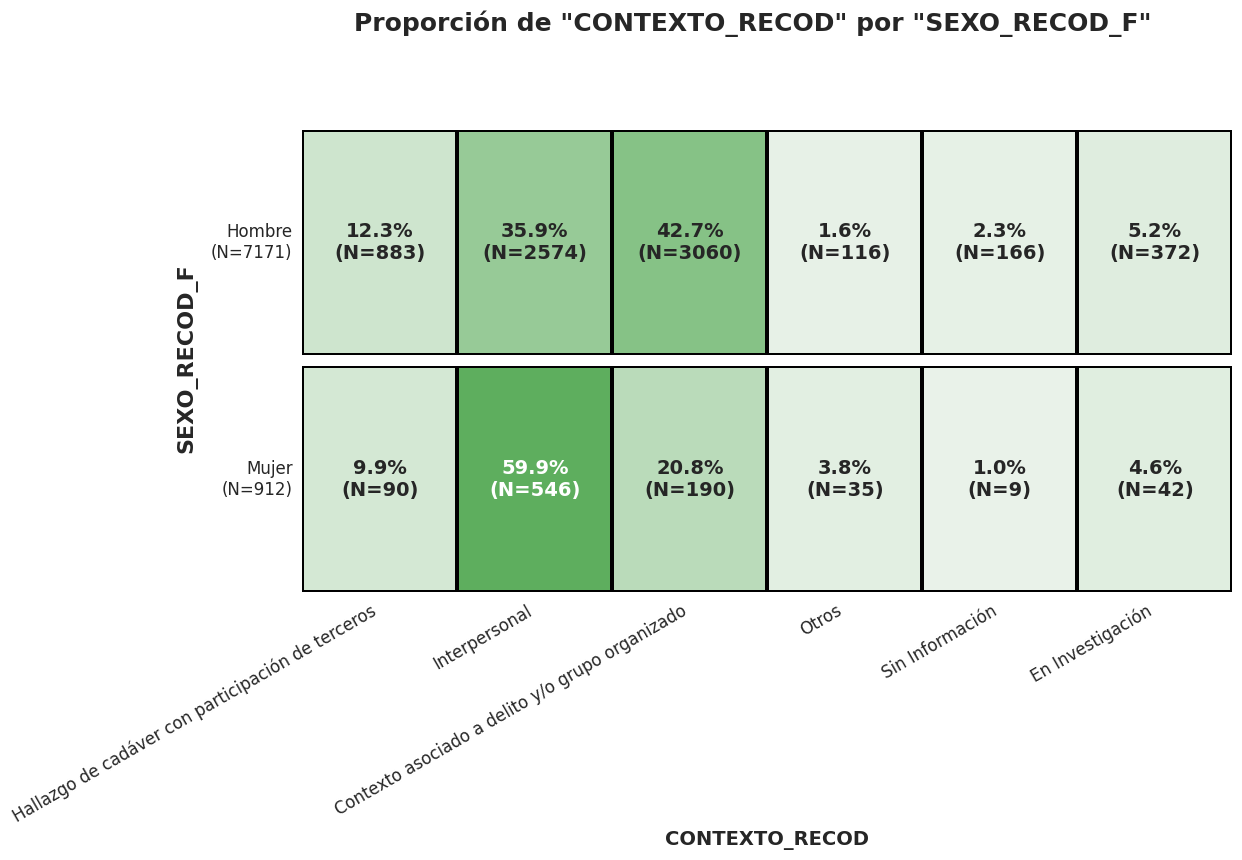

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Asumiendo que 'df' ya existe y está cargado ---
# df = pd.read_csv(...) o similar

# --- Configuración de Variables ---
df_original = df  # Asigna tu DataFrame cargado (ej. df)
col_filas = 'SEXO_RECOD_F'   # Columna para las filas (Y-axis)
col_columnas = 'CONTEXTO_RECOD' # Columna para las columnas (X-axis)

# Categorías que quieres MANTENER (el resto se filtra)
categorias_filas = ['Hombre', 'Mujer']

# --- ¡CAMBIO AQUÍ! ---
# Usando la lista completa que proporcionaste de .unique()
categorias_columnas = [
    'Hallazgo de cadáver con participación de terceros',
    'Interpersonal',
    'Contexto asociado a delito y/o grupo organizado',
    'Otros',
    'Sin Información',
    'En Investigación'
]
# --- FIN DE CAMBIOS ---

# Define UN SOLO color base para todo el gráfico
color_base_unificado = 'green'
# --- Fin de las variables ---


# 1. FILTRAR EL DATAFRAME ORIGINAL
df_filtrado = df_original[
    (df_original[col_filas].isin(categorias_filas)) &
    (df_original[col_columnas].isin(categorias_columnas))
].copy()

# (Recomendado) Convertir a categóricas para asegurar el orden
df_filtrado[col_filas] = pd.Categorical(df_filtrado[col_filas], categories=categorias_filas, ordered=True)
df_filtrado[col_columnas] = pd.Categorical(df_filtrado[col_columnas], categories=categorias_columnas, ordered=True)


# 2. CREAR TABLAS DE PROPORCIONES Y ABSOLUTOS
tabla_proporcion = pd.crosstab(
    index=df_filtrado[col_filas],
    columns=df_filtrado[col_columnas],
    normalize='index',
    dropna=False # Incluir si hay filas/columnas sin datos
)
tabla_porcentaje = (tabla_proporcion * 100).round(1)

tabla_absolutos = pd.crosstab(
    index=df_filtrado[col_filas],
    columns=df_filtrado[col_columnas],
    dropna=False # Incluir si hay filas/columnas sin datos
)

# 3. CREAR ETIQUETAS DE ANOTACIÓN PERSONALIZADAS
# Rellenar NaNs con 0 antes de crear etiquetas (si 'dropna=False' se usó)
tabla_porcentaje_str = (tabla_porcentaje.fillna(0)).astype(str)
tabla_absolutos_str = (tabla_absolutos.fillna(0)).astype(str)

annot_labels = (
    tabla_porcentaje_str + '%\n' +
    '(N=' + tabla_absolutos_str + ')'
)

# 4. OBTENER N TOTALES Y ACTUALIZAR ETIQUETAS DE FILAS
counts = df_filtrado[col_filas].value_counts()
categorias_filas_ordenadas = tabla_porcentaje.index.tolist()

categorias_filas_con_n = [f'{cat}\n(N={counts.get(cat, 0)})'
                          for cat in categorias_filas_ordenadas]

tabla_porcentaje.index = categorias_filas_con_n
annot_labels.index = categorias_filas_con_n

print("--- Tabla de Proporciones (%) con N total en filas ---")
print(tabla_porcentaje)
print("\n--- Tabla de Absolutos ---")
print(tabla_absolutos)


# 5. CONFIGURAR LA FIGURA
n_filas = len(categorias_filas_con_n)
fig, axes = plt.subplots(
    n_filas, 1,
    # --- ¡CAMBIO AQUÍ! (Más ancho para 6 categorías) ---
    figsize=(12, 3 * n_filas),
    sharex=True,
    gridspec_kw={'hspace': 0.05,
                 'height_ratios': [1] * n_filas
                }
)
if n_filas == 1:
    axes = [axes]

plt.suptitle(
    f'Proporción de "{col_columnas}" por "{col_filas}"',
    fontsize=18,
    fontweight='bold',
    y=1.08 # Ajustado un poco más arriba por el figsize
)

# 6. CREAR LA PALETA DE COLOR UNIFICADA
custom_cmap_unificado = sns.light_palette(color_base_unificado, as_cmap=True)

# 7. GENERAR LOS HEATMAPS
for i, categoria_con_n in enumerate(categorias_filas_con_n):

    datos_fila = tabla_porcentaje.loc[[categoria_con_n]]
    annot_labels_fila = annot_labels.loc[[categoria_con_n]]

    sns.heatmap(
        datos_fila,
        annot=annot_labels_fila,
        fmt='',
        annot_kws={'size': 14, 'fontweight': 'bold'},

        cmap=custom_cmap_unificado,
        linewidths=1.5,
        linecolor='black',
        cbar=False,
        ax=axes[i],
        vmin=0,
        vmax=100
    )

    axes[i].set_ylabel('')
    axes[i].set_yticklabels(axes[i].get_yticklabels(), rotation=0, fontsize=12)

    if i < n_filas - 1:
        axes[i].set_xlabel('')
        axes[i].set_xticklabels([]) # Ocultar etiquetas X excepto en la última

# 8. AJUSTES FINALES Y VISUALIZACIÓN
fig.supylabel(
    col_filas,
    fontsize=16,
    fontweight='bold',
    x=0.02  # Movido bien afuera (izquierda)
)
axes[-1].set_xlabel(
    col_columnas,
    fontsize=14,
    fontweight='bold'
)

# --- ¡CAMBIO AQUÍ! (Rotación para etiquetas X largas) ---
axes[-1].set_xticklabels(
    axes[-1].get_xticklabels(),
    fontsize=12,
    rotation=30,  # Rotar 30 grados
    ha='right'    # Alinear a la derecha
)

plt.tight_layout(rect=[0.05, 0.05, 1, 0.96]) # Ajustado 'bottom' para dar espacio a etiquetas rotadas

# Guardar la figura
plt.savefig("heatmap_proporciones_contexto.png", dpi=300, bbox_inches='tight')

print("\nGráfico guardado como 'heatmap_proporciones_contexto.png'")

Filtrando por SEXO_RECOD_F y LUG_AGR_RECOD2...
Datos filtrados y ordenados.
Calculando proporciones y absolutos...

--- Tabla de Proporciones (%) con N total en filas ---
LUG_AGR_RECOD2    Vía Pública  Domicilio Particular  Otros  Sin Información
Hombre\n(N=7171)         62.1                  21.9   12.6              3.4
Mujer\n(N=912)           31.5                  60.2    6.2              2.1

--- Tabla de Absolutos ---
LUG_AGR_RECOD2  Vía Pública  Domicilio Particular  Otros  Sin Información
SEXO_RECOD_F                                                             
Hombre                 4452                  1570    903              246
Mujer                   287                   549     57               19

Generando gráfico...


/tmp/ipython-input-3916154406.py:162: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.05, 0.05, 1, 0.96])



¡Gráfico guardado como 'heatmap_proporciones_LUG_AGR_RECOD2.png'!


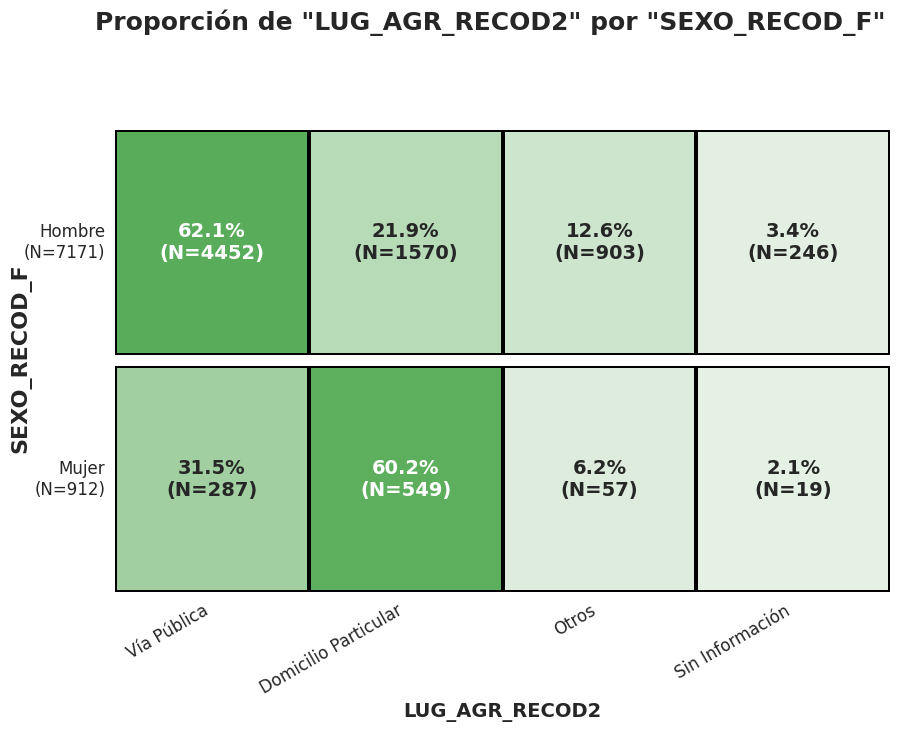

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Asumiendo que 'df' ya existe y está cargado ---
# Por ejemplo: df = pd.read_csv("tus_datos.csv")
# (Asegúrate de que 'df' exista)
df_original = df

# --- Configuración de Variables ---
col_filas = 'SEXO_RECOD_F'       # Columna para las filas (Y-axis)
col_columnas = 'LUG_AGR_RECOD2'  # Columna para las columnas (X-axis)

# Categorías que quieres MANTENER (el resto se filtra)
categorias_filas = ['Hombre', 'Mujer']

# Categorías de la nueva columna (según tu .unique())
categorias_columnas = [
    'Vía Pública',
    'Domicilio Particular',
    'Otros',
    'Sin Información'
]

# Define UN SOLO color base para todo el gráfico
color_base_unificado = 'green'
# --- Fin de las variables ---


# 1. FILTRAR EL DATAFRAME ORIGINAL
print(f"Filtrando por {col_filas} y {col_columnas}...")
df_filtrado = df_original[
    (df_original[col_filas].isin(categorias_filas)) &
    (df_original[col_columnas].isin(categorias_columnas))
].copy()

# (Recomendado) Convertir a categóricas para asegurar el orden
df_filtrado[col_filas] = pd.Categorical(df_filtrado[col_filas], categories=categorias_filas, ordered=True)
df_filtrado[col_columnas] = pd.Categorical(df_filtrado[col_columnas], categories=categorias_columnas, ordered=True)
print("Datos filtrados y ordenados.")

# 2. CREAR TABLAS DE PROPORCIONES Y ABSOLUTOS
print("Calculando proporciones y absolutos...")
tabla_proporcion = pd.crosstab(
    index=df_filtrado[col_filas],
    columns=df_filtrado[col_columnas],
    normalize='index',
    dropna=False # Incluir si hay filas/columnas sin datos
)
tabla_porcentaje = (tabla_proporcion * 100).round(1)

tabla_absolutos = pd.crosstab(
    index=df_filtrado[col_filas],
    columns=df_filtrado[col_columnas],
    dropna=False # Incluir si hay filas/columnas sin datos
)

# 3. CREAR ETIQUETAS DE ANOTACIÓN PERSONALIZADAS
# Rellenar NaNs con 0 antes de crear etiquetas (si 'dropna=False' se usó)
tabla_porcentaje_str = (tabla_porcentaje.fillna(0)).astype(str)
tabla_absolutos_str = (tabla_absolutos.fillna(0)).astype(str)

annot_labels = (
    tabla_porcentaje_str + '%\n' +
    '(N=' + tabla_absolutos_str + ')'
)

# 4. OBTENER N TOTALES Y ACTUALIZAR ETIQUETAS DE FILAS
counts = df_filtrado[col_filas].value_counts()
categorias_filas_ordenadas = tabla_porcentaje.index.tolist()

categorias_filas_con_n = [f'{cat}\n(N={counts.get(cat, 0)})'
                          for cat in categorias_filas_ordenadas]

tabla_porcentaje.index = categorias_filas_con_n
annot_labels.index = categorias_filas_con_n

print("\n--- Tabla de Proporciones (%) con N total en filas ---")
print(tabla_porcentaje)
print("\n--- Tabla de Absolutos ---")
print(tabla_absolutos)


# 5. CONFIGURAR LA FIGURA
print("\nGenerando gráfico...")
n_filas = len(categorias_filas_con_n)
n_cols = len(categorias_columnas) # Para ajustar el ancho

# Ajuste automático simple del ancho
ancho_figura_sugerido = max(10, n_cols * 2.5)

fig, axes = plt.subplots(
    n_filas, 1,
    figsize=(ancho_figura_sugerido, 3 * n_filas), # Ancho ajustado
    sharex=True,
    gridspec_kw={'hspace': 0.05,
                 'height_ratios': [1] * n_filas
                }
)
if n_filas == 1:
    axes = [axes]

plt.suptitle(
    f'Proporción de "{col_columnas}" por "{col_filas}"',
    fontsize=18,
    fontweight='bold',
    y=1.08
)

# 6. CREAR LA PALETA DE COLOR UNIFICADA
custom_cmap_unificado = sns.light_palette(color_base_unificado, as_cmap=True)

# 7. GENERAR LOS HEATMAPS
for i, categoria_con_n in enumerate(categorias_filas_con_n):

    datos_fila = tabla_porcentaje.loc[[categoria_con_n]]
    annot_labels_fila = annot_labels.loc[[categoria_con_n]]

    sns.heatmap(
        datos_fila,
        annot=annot_labels_fila,
        fmt='',
        annot_kws={'size': 14, 'fontweight': 'bold'}, # Tamaño de letra ajustado

        cmap=custom_cmap_unificado,
        linewidths=1.5,
        linecolor='black',
        cbar=False,
        ax=axes[i],
        vmin=0,
        vmax=100
    )

    axes[i].set_ylabel('')
    axes[i].set_yticklabels(axes[i].get_yticklabels(), rotation=0, fontsize=12)

    if i < n_filas - 1:
        axes[i].set_xlabel('')
        axes[i].set_xticklabels([]) # Ocultar etiquetas X excepto en la última

# 8. AJUSTES FINALES Y VISUALIZACIÓN
fig.supylabel(
    col_filas,
    fontsize=16,
    fontweight='bold',
    x=0.02
)
axes[-1].set_xlabel(
    col_columnas,
    fontsize=14,
    fontweight='bold'
)

# Ajustar rotación si las etiquetas son largas
axes[-1].set_xticklabels(
    axes[-1].get_xticklabels(),
    fontsize=12,
    rotation=30, # Rotar 30 grados
    ha='right'   # Alinear a la derecha
)

plt.tight_layout(rect=[0.05, 0.05, 1, 0.96])

# Guardar la figura
output_filename = f"heatmap_proporciones_{col_columnas}.png"
plt.savefig(output_filename, dpi=300, bbox_inches='tight')

print(f"\n¡Gráfico guardado como '{output_filename}'!");

##**Enfermedad vs Homicidios**


10. COMPARACIÓN DE MUERTES: ENFERMEDADES VS HOMICIDIOS



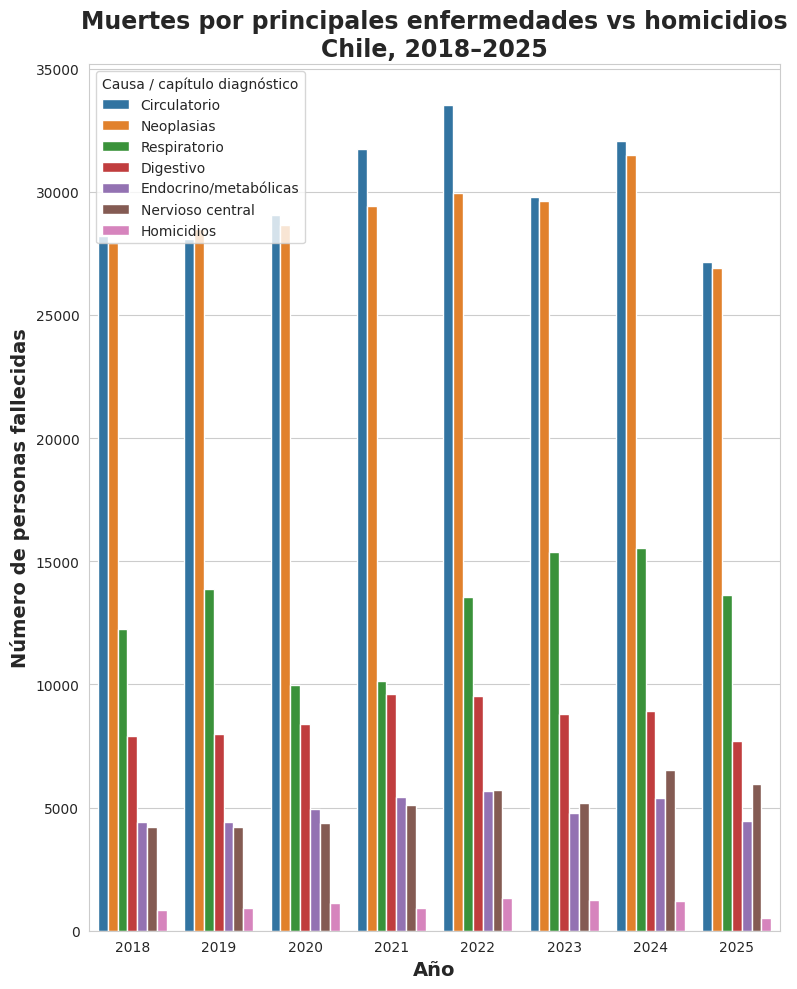

In [ ]:
# ============================================================
# 10. COMPARACIÓN MUERTES POR ENFERMEDADES vs HOMICIDIOS
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

def print_section(title):
    print("\n" + "=" * 70)
    print(title)
    print("=" * 70 + "\n")

print_section("10. COMPARACIÓN DE MUERTES: ENFERMEDADES VS HOMICIDIOS")

# ------------------------------------------------------------
# 10.1 Seleccionar causas DEIS de interés y agrupar por año
# ------------------------------------------------------------

causas_seleccionadas = [
    "Enfermedades del sistema circulatorio",
    "Enfermedades del sistema digestivo",
    "Enfermedades del sistema nervioso central",
    "Enfermedades del sistema respiratorio",
    "Enfermedades endocrinas, nutricionales y metabólicas",
    "Tumores [Neoplasias]",
]

# Aseguramos que AÑO sea numérico y filtramos 2018–2025
df_mortalidad_filtrado["AÑO"] = pd.to_numeric(
    df_mortalidad_filtrado["AÑO"], errors="coerce"
)

df_deis_sel = (
    df_mortalidad_filtrado[
        df_mortalidad_filtrado["AÑO"].between(2018, 2025)
        & df_mortalidad_filtrado["GLOSA_CAPITULO_DIAG1"].isin(causas_seleccionadas)
    ]
    .copy()
)

# Usamos el diccionario 'abreviaciones' que ya definiste antes
df_deis_sel["CAPITULO_CORTO"] = (
    df_deis_sel["GLOSA_CAPITULO_DIAG1"]
    .map(abreviaciones)
    .fillna(df_deis_sel["GLOSA_CAPITULO_DIAG1"])
)

muertes_deis_ano = (
    df_deis_sel
    .groupby(["AÑO", "CAPITULO_CORTO"])
    .size()
    .reset_index(name="n_muertes")
)

# ------------------------------------------------------------
# 10.2 Agrupar homicidios por año
# ------------------------------------------------------------

muertes_hom_ano = (
    df.groupby("ID_ANO")
      .size()
      .reset_index(name="n_muertes")
      .rename(columns={"ID_ANO": "AÑO"})
)

muertes_hom_ano = muertes_hom_ano[
    muertes_hom_ano["AÑO"].between(2018, 2025)
].copy()

muertes_hom_ano["CAPITULO_CORTO"] = "Homicidios"
# ------------------------------------------------------------
# 10.3 Unir ambas fuentes en un solo dataframe "largo"
# ------------------------------------------------------------

comparacion = pd.concat(
    [
        muertes_deis_ano[["AÑO", "CAPITULO_CORTO", "n_muertes"]],
        muertes_hom_ano[["AÑO", "CAPITULO_CORTO", "n_muertes"]],
    ],
    ignore_index=True,
)

# Orden deseado de las causas (de mayor a menor, a tu gusto)
orden_causas = [
    "Circulatorio",
    "Neoplasias",
    "Respiratorio",
    "Digestivo",
    "Endocrino/metabólicas",
    "Nervioso central",
    "Homicidios",
]

# Convertir a categoría ordenada
comparacion["CAPITULO_CORTO"] = pd.Categorical(
    comparacion["CAPITULO_CORTO"],
    categories=orden_causas,
    ordered=True
)

comparacion = comparacion.sort_values(["AÑO", "CAPITULO_CORTO"])

# ------------------------------------------------------------
# 10.4 Ordenar los años de mayor a menor (2018–2025)
# ------------------------------------------------------------

orden_anos = sorted(comparacion["AÑO"].unique())


# ------------------------------------------------------------
# 10.5 Gráfico
# ------------------------------------------------------------

plt.figure(figsize=(8, 10))

sns.barplot(
    data=comparacion,
    x="AÑO",
    y="n_muertes",
    hue="CAPITULO_CORTO",
    order=orden_anos,
    hue_order=orden_causas
)

plt.title(
    "Muertes por principales enfermedades vs homicidios\n"
    "Chile, 2018–2025",
    fontsize=17,
    fontweight="bold"
)

plt.xlabel("Año", fontsize=14, fontweight="bold")
plt.ylabel("Número de personas fallecidas", fontsize=14, fontweight="bold")
plt.legend(title="Causa / capítulo diagnóstico", loc="upper left")
plt.tight_layout()
plt.show()



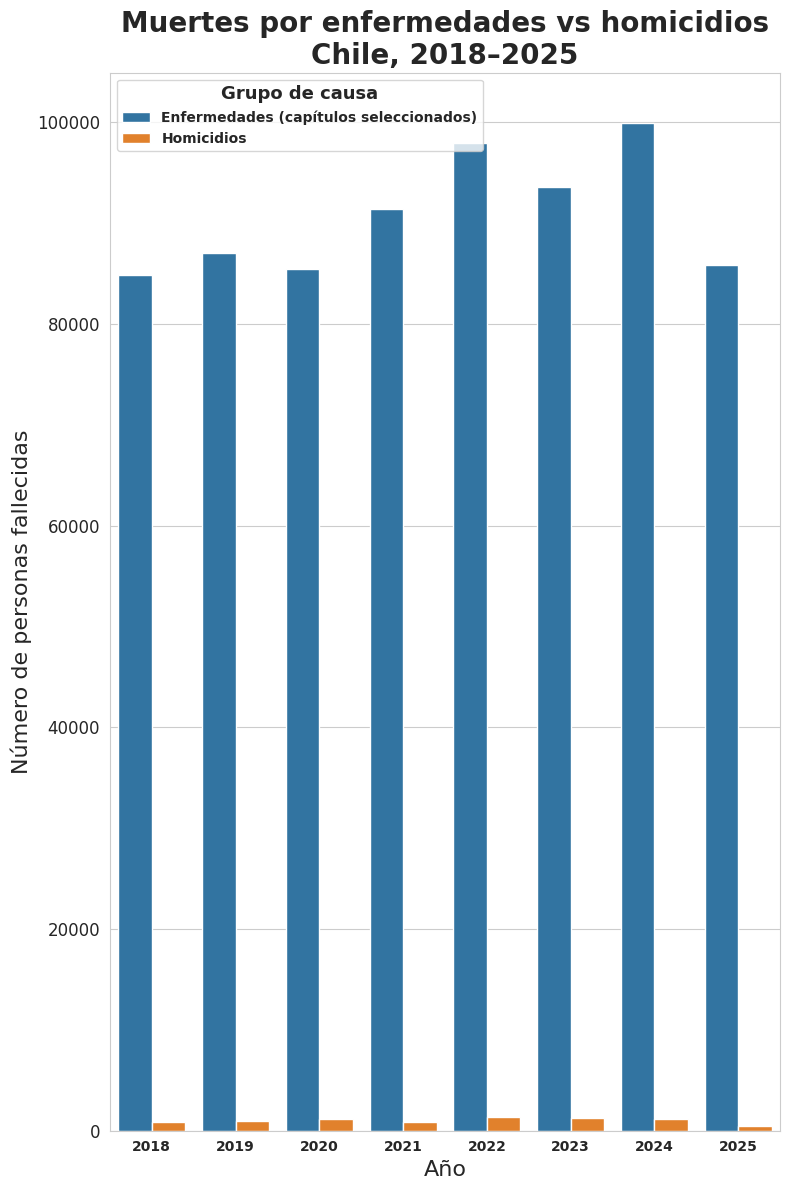

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Asumiendo que usas pandas

sns.set_style("whitegrid")

# ------------------------------------------------------------
# 1. Agrupar: Enfermedades (todas) vs Homicidios por año
# (Asegúrate de que 'comparacion' exista en tu script)
# ------------------------------------------------------------

# --- Simulación de 'comparacion' (si no existe) ---
if 'comparacion' not in locals():
    print("Simulando DataFrame 'comparacion' para demostración...")
    años = range(2018, 2026)
    grupos = ["Homicidios", "Enfermedad A", "Enfermedad B", "Enfermedad C"]
    data = []
    for año in años:
        for grupo in grupos:
            if grupo == "Homicidios":
                n_muertes = np.random.randint(1000, 1500)
            else:
                n_muertes = np.random.randint(10000, 30000)
            data.append({"AÑO": año, "CAPITULO_CORTO": grupo, "n_muertes": n_muertes})
    comparacion = pd.DataFrame(data)
# --------------------------------------------------------------------

df_vs_hom = (
    comparacion
    .assign(
        GRUPO = np.where(
            comparacion["CAPITULO_CORTO"] == "Homicidios",
            "Homicidios",
            "Enfermedades (capítulos seleccionados)"
        )
    )
    .groupby(["AÑO", "GRUPO"], as_index=False)["n_muertes"]
    .sum()
)

# Orden de años (de menor a mayor)
orden_anos = sorted(df_vs_hom["AÑO"].unique(), reverse=False)

# ------------------------------------------------------------
# 2. Gráfico de barras agrupadas (Formato Vertical)
# ------------------------------------------------------------

plt.figure(figsize=(8, 12)) # Formato vertical

sns.barplot(
    data=df_vs_hom,
    x="AÑO",
    y="n_muertes",
    hue="GRUPO",
    order=orden_anos,
    hue_order=["Enfermedades (capítulos seleccionados)", "Homicidios"]
)

plt.title(
    "Muertes por enfermedades vs homicidios\n"
    "Chile, 2018–2025",
    fontsize=20,
    fontweight="bold"
)

plt.xlabel("Año", fontsize=16)
plt.ylabel("Número de personas fallecidas", fontsize=16)
plt.xticks(fontweight='bold') # Años en negrita
plt.yticks(fontsize=12)

# --- CORRECCIÓN APLICADA ---
plt.legend(
    title="Grupo de causa",
    fontsize='12', # Tamaño del texto de las etiquetas

    # Instrucción combinada para el TÍTULO de la leyenda:
    title_fontproperties={'weight': 'bold', 'size': 13},

    # Instrucción para el TEXTO de las etiquetas:
    prop={'weight': 'bold'}
)
# ---------------------------

plt.tight_layout()

# Guardamos la imagen para que la veas
plt.savefig("grafico_vertical_corregido.png")

# Mostramos el gráfico (si estás en un entorno como Jupyter)
plt.show()